In [118]:
from utils import *
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')

# notes
- assumption: distance metric for comparing context representations 

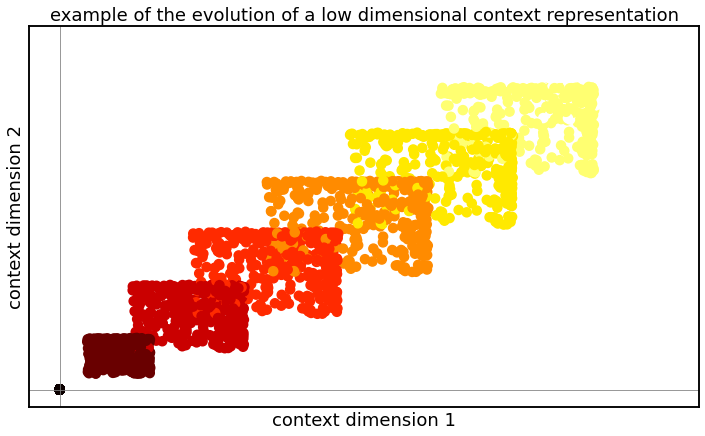

In [125]:
plt.figure(figsize=(12,7))
ax = plt.gca()
for _ in range(350):
  C = fast_n_sphere(n_steps=20, dim=3, var=0.001, mean=.2)[0]
  nsteps = 8
  c = np.abs(C[:nsteps,(0,1)] - C[0,(0,1)])
  ax.scatter(c[:,0],c[:,1],c=np.arange(nsteps),
              cmap=plt.get_cmap('hot'))


ax.axvline(0,c='grey',lw=.8)
ax.axhline(0,c='grey',lw=.8)
c.max()
ax.set_xlabel('context dimension 1')
ax.set_ylabel('context dimension 2')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('example of the evolution of a low dimensional context representation')

plt.savefig('lowdim_context_sample')


### re-initializing context

In [126]:
from scipy.spatial import distance 

nitr = 1000
metric='cosine'
dtL = [2,4,8]
t0 = 3
D ={}

for dt in dtL:
  D[dt] = []
  for itr in range(nitr):
    """ re-init context"""
    C = fast_n_sphere(n_steps=20, dim=7, var=0.25, mean=0.25)[0]
    # sample int between 0 and nsteps
    # take 
    C0 = C[t0,:]
    C1 = C[t0+dt]
    # compute distance
    dist = distance.cdist([C0],[C1],metric=metric)[0,0]
    # collect
    D[dt].append(dist)

D = {k:np.array(v) for k,v in D.items()}


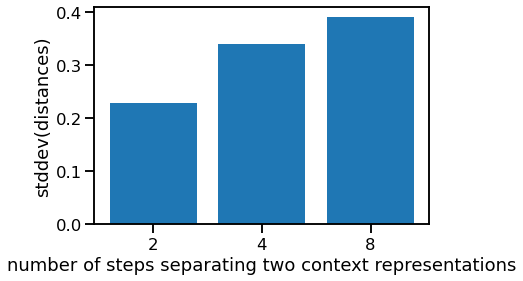

In [143]:
""" greater variance in the distance separating context representations
that are a larger number of steps apart
"""
ax = plt.gca()
ax.bar(np.arange(len(D)),[i.std() for i in D.values()])
ax.set_ylabel('stddev(distances)')
ax.set_xlabel('number of steps separating two context representations')
ax.set_xticks(np.arange(len(dtL)))
ax.set_xticklabels(dtL)

plt.savefig('stdev bars')

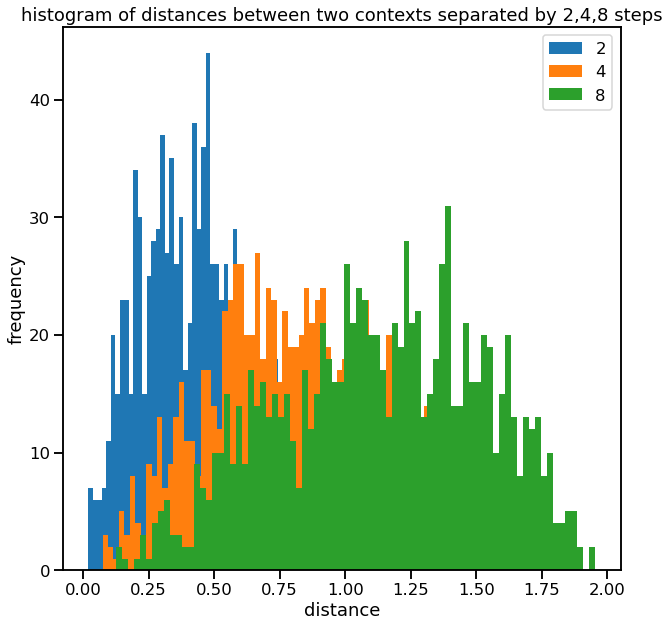

In [142]:
plt.figure(figsize=(10,10))
ax = plt.gca()
for dt_ in dtL:
  ax.hist(D[dt_],bins=80,label=dt_)
plt.legend()
ax.set_ylabel('frequency')
ax.set_xlabel('distance')
ax.set_title('histogram of distances between two contexts separated by %i,%i,%i steps'%(
  dtL[0],dtL[1],dtL[2]))

None
plt.savefig('hist')